In [7]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
import aggdraw
%matplotlib inline

In [20]:
%load_ext autoreload
%autoreload 2
import utils as U

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


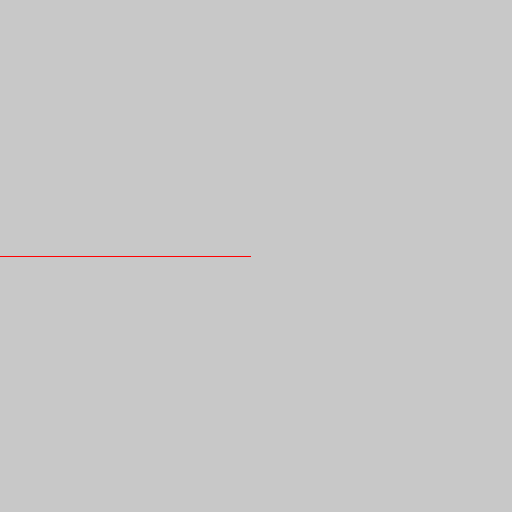

In [9]:
image = Image.new("RGB", (512, 512), (200, 200, 200))

draw = ImageDraw.Draw(image)

w, h = image.size
xs = np.arange(0, 0.5, 0.01)
ys = np.ones(len(xs)) * 0.5
p = np.vstack([xs, ys]).T

draw.polygon((p * np.array([[w, h]])).flatten().tolist(), outline="red")
image

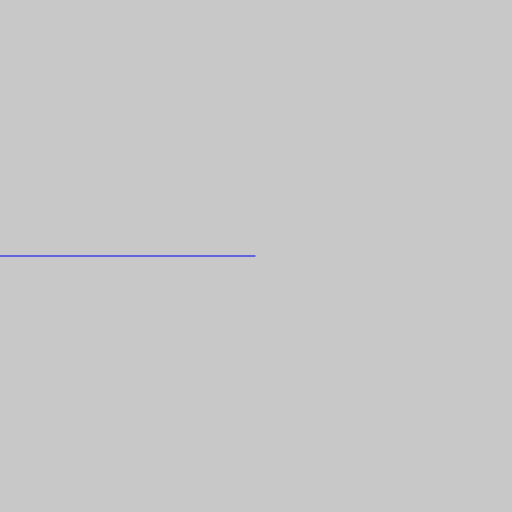

In [10]:
image = Image.new("RGB", (512, 512), (200, 200, 200))

draw = aggdraw.Draw(image)
pen = aggdraw.Pen('blue', 1)

w, h = image.size
xs = np.arange(0, 0.5, 0.001)
ys = np.ones(len(xs)) * 0.5
p = np.vstack([xs, ys]).T

draw.line((p * np.array([[w, h]])).flatten().tolist(), pen)
draw.flush()
image

# ふちどりする

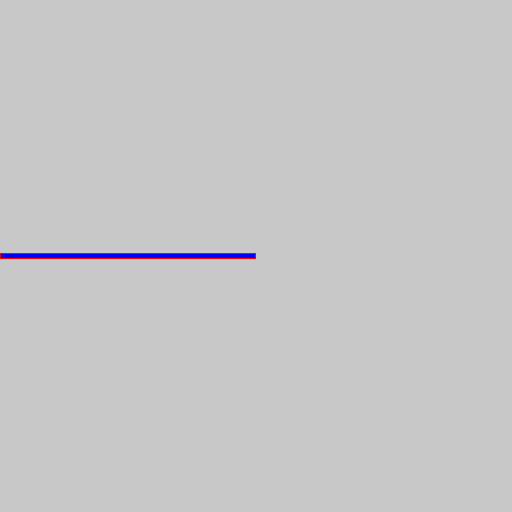

In [11]:
image = Image.new("RGB", (512, 512), (200, 200, 200))
draw = ImageDraw.Draw(image)

linewidth = np.ones(len(p)) * 0.01

diff = np.diff(p, axis=0)
diff = np.vstack([diff, diff[-1:]])

norm = diff[:, ::-1] * np.array([[1, -1]])
norm = norm / np.linalg.norm(norm, axis=1)[:, None]

a = p + norm * linewidth[:, None] * 0.5
b = p[::-1] - norm * linewidth[:, None] * 0.5

draw.polygon(((np.vstack([a, b])) * np.array([[w, h]])).flatten().tolist(), outline="red", fill='blue')
image

# ふとらせる

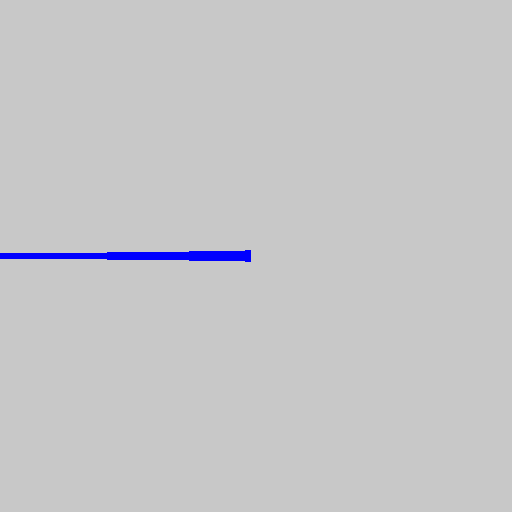

In [12]:
image = Image.new("RGB", (512, 512), (200, 200, 200))
draw = ImageDraw.Draw(image)

xs = np.arange(0, 0.5, 0.01)
ys = np.ones(len(xs)) * 0.5
p = np.vstack([xs, ys]).T

linewidth = 0.01 + np.linspace(0, 1, len(p)) ** 2 * 0.01

diff = np.diff(p, axis=0)
diff = np.vstack([diff, diff[-1:]])

norm = diff[:, ::-1] * np.array([[1, -1]])
norm = norm / np.linalg.norm(norm, axis=1)[:, None]

a = p + norm * linewidth[:, None] * 0.5
b = p - norm * linewidth[:, None] * 0.5
b = b[::-1]

w, h = image.size
draw.polygon(((np.vstack([a, b])) * np.array([[w, h]])).flatten().tolist(), fill='blue')
image

# 描画メソッドをaggdrawに変更

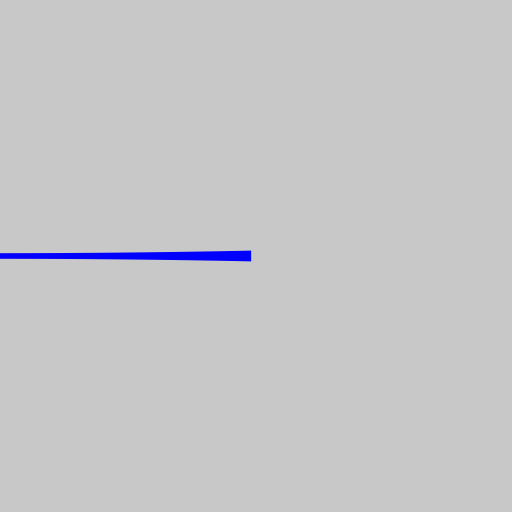

In [26]:
image = Image.new("RGB", (512, 512), (200, 200, 200))

xs = np.arange(0, 0.5, 0.01)
ys = np.ones(len(xs)) * 0.5
p = np.vstack([xs, ys]).T

linewidth = 0.01 + np.linspace(0, 1, len(p)) ** 2 * 0.01

norm = U.makenorm(p)

a = p + norm * linewidth[:, None] * 0.5
b = p - norm * linewidth[:, None] * 0.5
b = b[::-1]

w, h = image.size
draw = aggdraw.Draw(image)

# pen = aggdraw.Pen("blue", 1)
brush = aggdraw.Brush("blue")
draw.line(((np.vstack([a, b])) * np.array([[w, h]])).flatten().tolist(), brush)
draw.flush()
image

# 曲げてみる

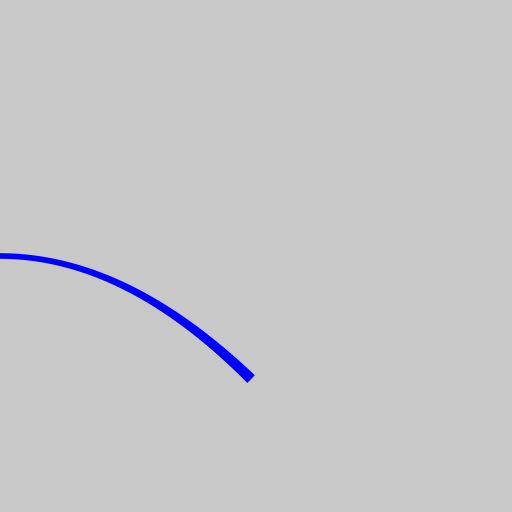

In [63]:
image = Image.new("RGB", (512, 512), (200, 200, 200))

xs = np.arange(0, 0.5, 0.01)
ys = xs ** 2 + 0.5
p = np.vstack([xs, ys]).T

linewidth = 0.01 + np.linspace(0, 1, len(p)) ** 2 * 0.01

norm = U.makenorm(p)

a = p + norm * linewidth[:, None] * 0.5
b = p - norm * linewidth[:, None] * 0.5
b = b[::-1]

w, h = image.size
draw = aggdraw.Draw(image)

# pen = aggdraw.Pen("blue", 1)
brush = aggdraw.Brush("blue")
draw.line(((np.vstack([a, b])) * np.array([[w, h]])).flatten().tolist(), brush)
draw.flush()
image

# しずくを描く

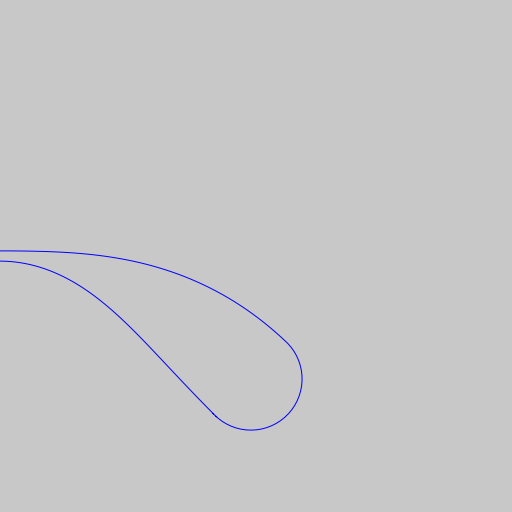

In [109]:
image = Image.new("RGB", (512, 512), (200, 200, 200))

xs = np.arange(0, 0.5, 0.01)
ys = xs ** 2 + 0.5
p = np.vstack([xs, ys]).T

center = 0.8
size = 0.1

norm = U.makenorm(p)
a = norm * U.ease_inout(len(p), 0.1).reshape(-1, 1) * size
angle = np.arctan2(*norm[-1])
b = U.arc(p[-1], size, angle - np.pi, angle)

outline = np.vstack([p + a, b, (p - a)[::-1]])

pen = aggdraw.Pen("blue", 1)
draw = aggdraw.Draw(image)
draw.line((outline * np.array([[w, h]])).flatten().tolist(), pen)
draw.flush()
image

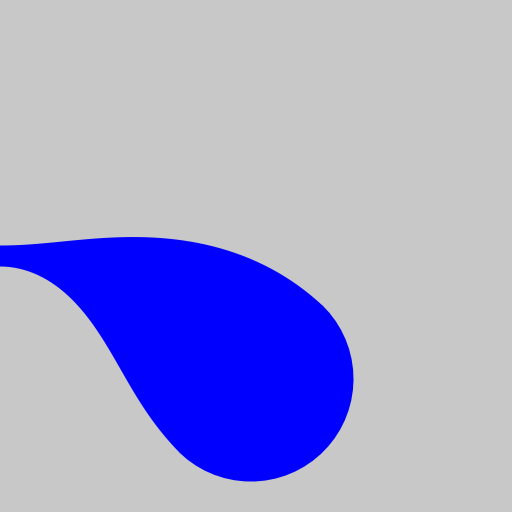

In [136]:
image = Image.new("RGB", (512, 512), (200, 200, 200))

xs = np.arange(0, 0.5, 0.01)
ys = xs ** 2 + 0.5
p = np.vstack([xs, ys]).T

outline = U.make_drop(p, 0.1, 0.2)
U.fill(image, outline, 'blue')
image

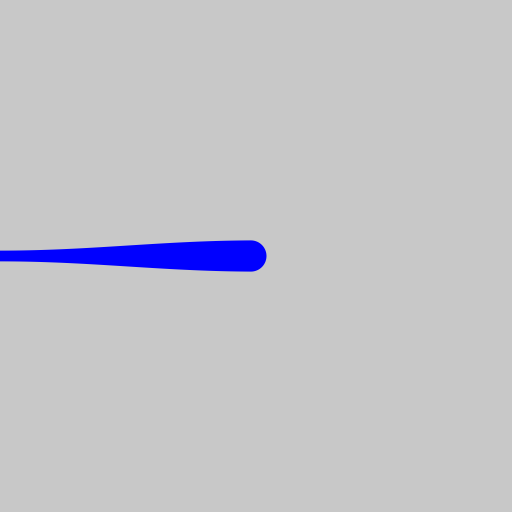

In [174]:
image = Image.new("RGB", (512, 512), (200, 200, 200))

xs = np.arange(0, 0.5, 0.01)
ys = np.ones(len(xs)) * 0.5
p = np.vstack([xs, ys]).T

outline = U.make_drop(p, 0.01, 0.03)
U.fill(image, outline, 'blue')
image

# 組み合わせの実装

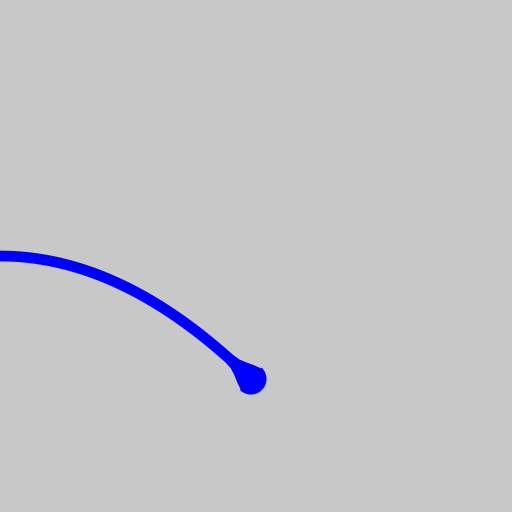

In [173]:
image = Image.new("RGB", (512, 512), (200, 200, 200))

xs = np.arange(0, 0.5, 0.01)
ys = xs ** 2 + 0.5
p = np.vstack([xs, ys]).T

linewidth = 0.01
outline = U.make_outline(p, linewidth)
U.fill(image, outline, 'blue')

outline = U.make_drop(p[-len(p)//10:], linewidth, linewidth * 3)
U.fill(image, outline, 'blue')


image

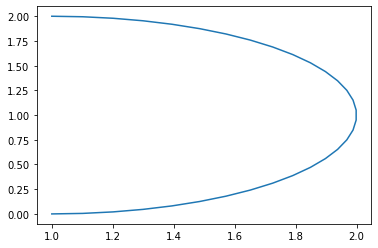

In [71]:
plt.plot(*U.arc(np.array([1, 1]), 2, np.pi/2, -np.pi/2, 32).T)

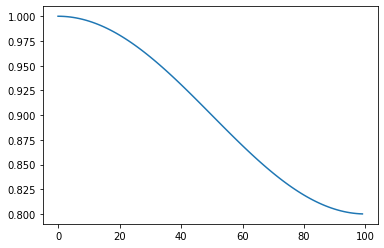

In [148]:
plt.plot(U.ease_inout(100, 1.0, 0.8))